In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Crimes by districts
crime = pd.read_csv('crime_by_district.csv')
crime.head(2) 

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53


In [3]:
# Checking if there some information that is no valid. All information is OK
crime.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [4]:
# Importing prison statistics
prison = pd.read_csv('Age_group.csv')
prison.head(2) 

,state_name,is_state,year,category,type,gender,age_16_18,age_18_30,age_30_50,age_50_above
0,A & N Islands,0,2001,Foreigners,Convicts,Female,0.0,0,0,0
1,A & N Islands,0,2001,Foreigners,Convicts,Male,0.0,12,139,2


In [5]:
# Checking if there some information that is no valid. 
# All information is OK except only 1 in all table. So I'm not going to do nothing with it
prison.isnull().sum()

state_name      0
is_state        0
year            0
category        0
type            0
gender          0
age_16_18       1
age_18_30       0
age_30_50       0
age_50_above    0
dtype: int64

In [6]:
# Importing Crimes of stolen property
prop = pd.read_csv('10_Property_stolen_and_recovered.csv')
prop.head(3) 

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904


In [7]:
# Checking if there some information that is no valid. 
# All information is OK 
prop.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [8]:
# Checking what kind of data I have
prop['Area_Name'].value_counts().head()

Uttar Pradesh                70
Andaman & Nicobar Islands    70
Dadra & Nagar Haveli         70
Himachal Pradesh             70
Manipur                      70
Name: Area_Name, dtype: int64

In [9]:
# Checking what kind of data I have
prop['Year'].value_counts().head()

2009    245
2005    245
2003    245
2001    245
2010    245
Name: Year, dtype: int64

In [10]:
# Checking what kind of data I have
prop['Group_Name'].value_counts().head(8)

Dacoity -Property                      350
Other heads of Property                350
Theft - Property                       350
Burglary - Property                    350
Criminal Breach of Trust - Property    350
Robbery - Property                     350
Total Property                         349
Name: Group_Name, dtype: int64

In [11]:
# Checking what kind of data I have
prop.shape

(2449, 8)

In [12]:
# Counting mean number of cases of property stolen
prop_area = prop.groupby(["Area_Name"]).agg({'Cases_Property_Stolen':'mean'}).reset_index()
area_sort = prop_area.sort_values(['Cases_Property_Stolen'], ascending = False)
area_sort.head()

,Area_Name,Cases_Property_Stolen
20,Maharashtra,19668.771429
19,Madhya Pradesh,10478.914286
1,Andhra Pradesh,9183.171429
32,Uttar Pradesh,7999.571429
11,Gujarat,7629.428571


In [13]:
# drop the rows that are having less robbery then 1% from all robberies in the country (17 regions less)
area_sort_less = area_sort.loc[area_sort['Cases_Property_Stolen'] > 1196]
area_sort_less = area_sort_less.round(0)
area_sort_less.head()

,Area_Name,Cases_Property_Stolen
20,Maharashtra,19669.0
19,Madhya Pradesh,10479.0
1,Andhra Pradesh,9183.0
32,Uttar Pradesh,8000.0
11,Gujarat,7629.0


In [14]:
# The size of table in the beggining
area_sort.shape

(35, 2)

In [15]:
# The result after filtering 1%
area_sort_less.shape

(18, 2)

In [16]:
# Here I was counting sum of all cases to findout what is 1%
area_sort['Cases_Property_Stolen'].sum()

119630.95652173914

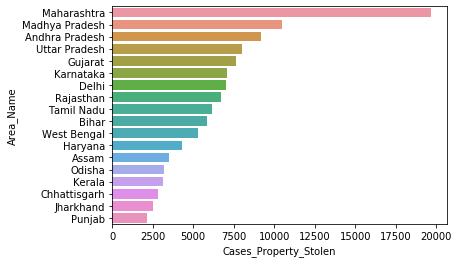

In [17]:
# Visualization of the data I've got
sns.barplot(x="Cases_Property_Stolen", y="Area_Name", data = area_sort_less)

In [18]:
# Checking shape of information
prop['Year'].value_counts()
# Calculating mean of property stolen cases
prop_year = prop.groupby(["Year"]).agg({'Cases_Property_Stolen':'mean'}).reset_index()
# Sorting values by year and by ascending for better visualization
year_sort = prop_year.sort_values(['Year'], ascending = True)
# Rounding floating data and transforming to inegers for to get rid of points
year_sort = year_sort.round(0).astype('int32')
year_sort

,Year,Cases_Property_Stolen
0,2001,3228
1,2002,3160
2,2003,3084
3,2004,3316
4,2005,3264
5,2006,3320
6,2007,3513
7,2008,3726
8,2009,3722
9,2010,3862


<BarContainer object of 10 artists>

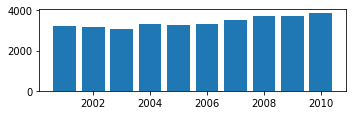

In [19]:
#r Creating plot of xases of property stolen by year
fig, ax = plt.subplots(figsize=(5.5,1.5))
ax.bar(year_sort['Year'], year_sort['Cases_Property_Stolen'])


In [20]:
# Reading the table
prison.head()

,state_name,is_state,year,category,type,gender,age_16_18,age_18_30,age_30_50,age_50_above
0,A & N Islands,0,2001,Foreigners,Convicts,Female,0.0,0,0,0
1,A & N Islands,0,2001,Foreigners,Convicts,Male,0.0,12,139,2
2,A & N Islands,0,2001,Foreigners,Detenus,Female,0.0,0,0,0
3,A & N Islands,0,2001,Foreigners,Detenus,Male,0.0,0,0,0
4,A & N Islands,0,2001,Foreigners,Others,Female,0.0,0,0,0


In [21]:
# Watching the shape of data
prison.shape

(7152, 10)

In [22]:
# What is the distribution by genders?
sex = pd.DataFrame(prison['gender'].value_counts())
sex

,gender
Male,3576
Female,3576


In [23]:
# And by indians and foreignians
category = pd.DataFrame(prison['category'].value_counts())
category

,category
Indians,3576
Foreigners,3576


In [50]:
# Creating table sorted by years and counting number of prisoners
prison_age = prison.groupby(["year"]).agg({'age_16_18':'sum', 'age_18_30':'sum', 'age_30_50':'sum', 'age_50_above':'sum'}).reset_index()
# Transforming floats to integers
prison_age = prison_age.round(0)
prison_age = prison_age.astype('int32')
prison_age

,year,age_16_18,age_18_30,age_30_50,age_50_above
0,2001,5752,139747,136789,31347
1,2002,3877,147206,137181,34093
2,2003,2152,141362,146791,36214
3,2004,1055,141115,151803,37418
4,2005,1370,154557,159720,42721
5,2006,663,154864,171517,46227
6,2007,495,162729,170874,42298
7,2008,174,160080,177359,47140
8,2009,64,163198,166278,47429
9,2010,257,160044,162044,46653


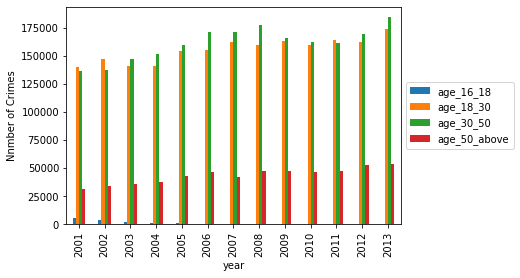

In [51]:
# Visualization of data
prison_count = prison_age[['year', 'age_16_18', 'age_18_30', 'age_30_50', 'age_50_above']]
prison_count.plot.bar('year')

plt.ylabel('Nnmber of Crimes')
plt.legend(loc ='center left', bbox_to_anchor = (1, 0.5))

In [59]:
# Checking out the number of males and females in prison
prison_age2 = prison.groupby(["gender"]).agg({'age_16_18':'sum', 'age_18_30':'sum', 'age_30_50':'sum', 'age_50_above':'sum'}).reset_index()
prison_age2

,gender,age_16_18,age_18_30,age_30_50,age_50_above
0,Female,293.0,65172,96113,28892
1,Male,15800.0,1960445,1999226,536769


In [63]:
# Counting % of prisoners by gender 
prison_gender = prison_age2[['age_16_18', 'age_18_30', 'age_30_50', 'age_50_above']]
gender_age = pd.DataFrame(prison_gender.sum(axis = 1)).reset_index()
gender_age = gender_age.rename(columns = {'index':'Gender', 0:'Number_of_crimes'}).sort_values(by = 'Number_of_crimes', ascending = True)
gender_age['Gender'] = prison_age2['gender']
gender_age

,Gender,Number_of_crimes
0,Female,190470.0
1,Male,4512240.0


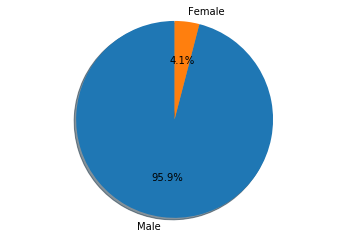

In [53]:
# and visualizating
labels = ['Male', 'Female']
sizes = [4512240, 190470]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [30]:
# Reading the table of crimes by year and by districts
crime.head(2)

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53


In [31]:
# Now making table of types of crimes and their numbers
crime_types = crime[['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt']]
crime2 = pd.DataFrame(crime_types.sum(axis = 0)).reset_index()
crime2 = crime2.rename(columns = {'index':'Type_of_crime', 0:'Number_of_crimes'}).sort_values(by = 'Number_of_crimes', ascending = False)
crime2

,Type_of_crime,Number_of_crimes
6,Hurt,108112
1,Assault on women,35983
0,Murder,17152
2,Kidnapping and Abduction,10610
5,Arson,5812
4,Robbery,2030
3,Dacoity,880


In [32]:
# Trying to find out the number of crimes by regions
crime_regions = crime.groupby(["STATE/UT"]).agg({'Murder':'mean', 'Assault on women':'mean', 'Kidnapping and Abduction':'mean', 
                                           'Dacoity':'mean', 'Robbery':'mean', 'Arson':'mean', 'Hurt':'mean'}).reset_index()

crime_sum = pd.DataFrame(crime_regions['STATE/UT'])
crime_sum['Number_of_crimes'] = crime_regions.sum(axis = 1).round(0).astype('int32')
crime_reg = crime_sum.sort_values(by = 'Number_of_crimes', ascending = False)
crime_reg.head()

,STATE/UT,Number_of_crimes
38,MADHYA PRADESH,52
43,Madhya Pradesh,51
2,ANDHRA PRADESH,50
5,Andhra Pradesh,50
57,Rajasthan,47


In [33]:
# Since there are the same regions but with different names lets create a small DataFrame by hands 
# just to visualyze Top criminal regions
data = {'Region':['Madhya Pradesh', 'Andhra Pradesh', 'Rajasthan', 'Odisha', 'Kerala', 'Uttar Pradesh'],
       'Number_of_crimes':[51 + 52, 50 + 50, 47 + 41, 44 + 20, 38 + 25, 35 + 33]}
regions_crime = pd.DataFrame(data)
regions_crime = regions_crime.sort_values(by = 'Number_of_crimes', ascending = False)
regions_crime

,Region,Number_of_crimes
0,Madhya Pradesh,103
1,Andhra Pradesh,100
2,Rajasthan,88
5,Uttar Pradesh,68
3,Odisha,64
4,Kerala,63


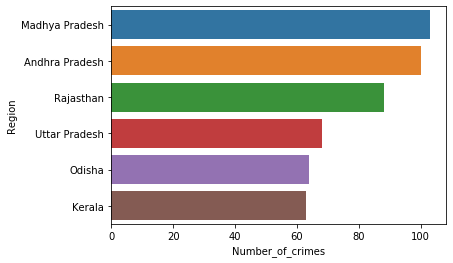

In [34]:
# Number of crimes by regions
sns.barplot(x="Number_of_crimes", y="Region", data = regions_crime)

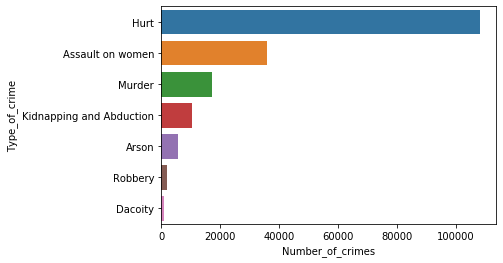

In [35]:
# Number of crimes by types of crimes
sns.barplot(y = 'Type_of_crime', x = 'Number_of_crimes', data = crime2)

In [36]:
# reading a new table
crime.head(2)

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53


In [37]:
# discovering the amount of information
crime.shape

(9841, 13)

In [38]:
# Aggregating and grouping rows to summerise the information
crime_years = crime.groupby(["Year"]).agg({'Murder':'sum', 'Assault on women':'sum', 'Kidnapping and Abduction':'sum', 
                                           'Dacoity':'sum', 'Robbery':'sum', 'Arson':'sum', 'Hurt':'sum'}).reset_index()

crime_years

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt
0,2001,1526,2632,800,82,266,708,9094
1,2002,1478,2664,636,58,210,644,8982
2,2003,1162,2178,464,48,140,408,7938
3,2004,1308,2314,506,52,144,422,7648
4,2005,1338,2344,516,52,160,420,7694
5,2006,1346,2435,560,60,180,452,7522
6,2007,1348,2698,664,46,172,476,7628
7,2008,1244,2906,954,100,162,448,8268
8,2009,1258,2700,1022,84,134,390,8644
9,2010,1144,2700,1020,82,150,300,8688


In [39]:
# drop 2011-2013 to merge with property another dataframe by years
crime_years2 = crime_years.drop([10, 11, 12])
crime_years2

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt
0,2001,1526,2632,800,82,266,708,9094
1,2002,1478,2664,636,58,210,644,8982
2,2003,1162,2178,464,48,140,408,7938
3,2004,1308,2314,506,52,144,422,7648
4,2005,1338,2344,516,52,160,420,7694
5,2006,1346,2435,560,60,180,452,7522
6,2007,1348,2698,664,46,172,476,7628
7,2008,1244,2906,954,100,162,448,8268
8,2009,1258,2700,1022,84,134,390,8644
9,2010,1144,2700,1020,82,150,300,8688


In [40]:
# merging and setting in order the information
crime_all = crime_years2.drop(['Year'], axis = 1)
crime_sum = pd.DataFrame(crime_all.sum(axis = 1, skipna = True))
crime_sum = crime_sum.rename(columns = {0:'Num_of_crimes'})
crime_sum['Year'] = crime_years2['Year']
crime_sum = crime_sum.merge(year_sort)
crime_sum = crime_sum[['Year', 'Num_of_crimes', 'Cases_Property_Stolen']]
crime_sum

,Year,Num_of_crimes,Cases_Property_Stolen
0,2001,15108,3228
1,2002,14672,3160
2,2003,12338,3084
3,2004,12394,3316
4,2005,12524,3264
5,2006,12555,3320
6,2007,13032,3513
7,2008,14082,3726
8,2009,14232,3722
9,2010,14084,3862


In [41]:
# discovering types of data
crime_sum.dtypes

Year                     int64
Num_of_crimes            int64
Cases_Property_Stolen    int32
dtype: object

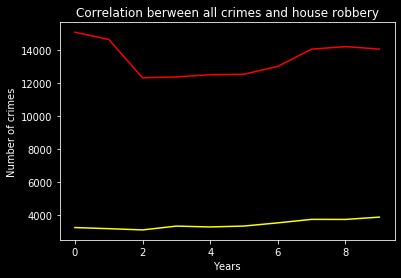

In [74]:
# Visualising information and preparing for the dark presentation slide
with plt.style.context('dark_background'): #seaborn-white
    plt.plot(crime_sum['Num_of_crimes'], color = 'red')
    plt.plot(crime_sum['Cases_Property_Stolen'], color = 'yellow')
    # Number of accent colors in the color scheme
    plt.title('Correlation berween all crimes and house robbery')
    plt.xlabel('Years')
    plt.ylabel('Number of crimes')

plt.show()

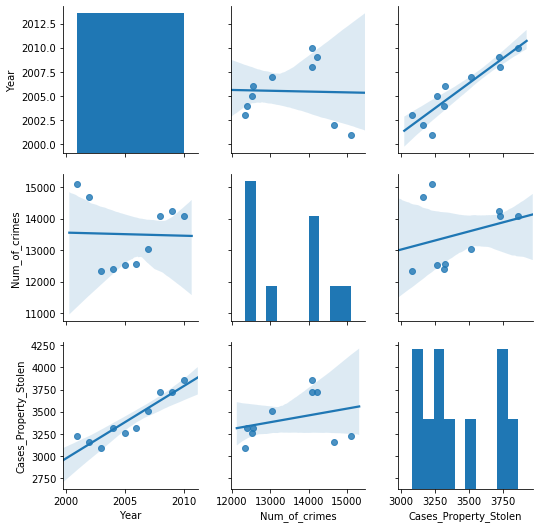

In [51]:
# Trying to find some correlations
sns.pairplot(crime_sum, kind="reg")
# there is a correlation between cases of property stolen and years. With time the number of cases is growing.

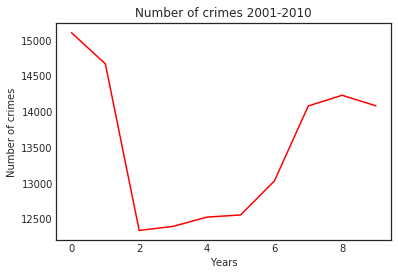

In [47]:
# changing plot's view for another slide
with plt.style.context('seaborn-white'): 
    plt.plot(crime_sum['Num_of_crimes'], color = 'red')

    # Number of accent colors in the color scheme
    plt.title('Number of crimes 2001-2010')
    plt.xlabel('Years')
    plt.ylabel('Number of crimes')

plt.show()

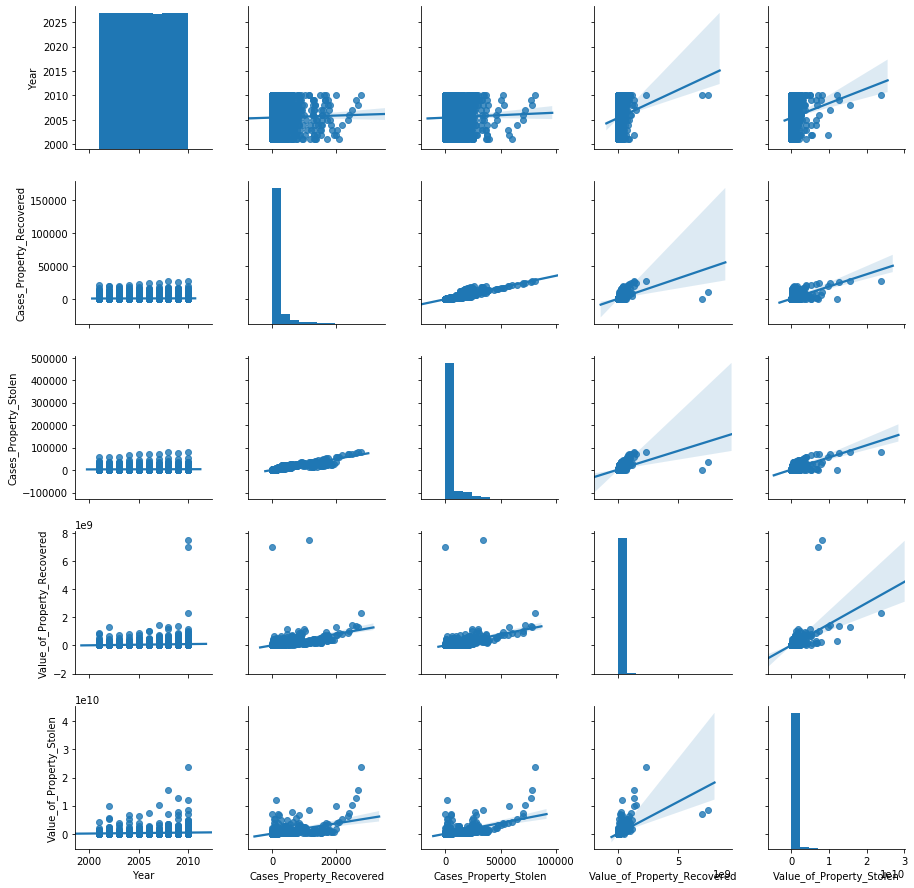

In [48]:
# Trying to find some other correlations
# correlation that I found was between the value of property stolen and the value of property recovered.
sns.pairplot(prop, kind="reg")